<a href="https://colab.research.google.com/github/EisaacJC/optativa_ciia/blob/main/Homework2_Isaac_Caballero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
## Emmanuel Isaac Juarez Caballero
### Center of artificial intelligence.


Instalando Wordcloud

In [ ]:
!pip install wordcloud

Librerías usadas en el desarrollo del problema.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from tensorflow import keras
from tensorflow.keras import layers
from pandas import DataFrame

In [ ]:
df=pd.read_csv("/content/StormEvents_2013.csv")

In [ ]:
df;

Verificación de la estructura

In [ ]:
"""for element in df["Begin_Lat"]:
    print(element)"""

'for element in df["Begin_Lat"]:\n    print(element)'

Remplazar los valores na por 0

In [ ]:
df=df.fillna(0)
df.dropna

<bound method DataFrame.dropna of        EpisodeID  ...                                    Event_Narrative
0          71313  ...  Three to five inches of snow fell across easte...
1          81847  ...  Eight to nine inches of snow fell across easte...
2          72356  ...  Five to sixteen inches of snow fell across eas...
3          78671  ...                A tree on Harbor Avenue was downed.
4          71943  ...  Sixteen to twenty-four inches of snow fell acr...
...          ...  ...                                                ...
59980      79979  ...  Lake effect snow bands set up over northern an...
59981      79979  ...  Lake effect snow bands set up over western Cas...
59982      79980  ...  Lake effect snow bands set up over the area du...
59983      79980  ...  Lake effect snow bands set up over the area du...
59984      79980  ...  Lake effect snow bands set up over the area du...

[59985 rows x 23 columns]>

In [ ]:
df.dropna
df.fillna(0)
df;

Valores que están presentes en la serie.

In [ ]:
df["Event_Type"].unique() 

array(['Winter Weather', 'Heavy Snow', 'Strong Wind', 'High Wind',
       'Blizzard', 'Hail', 'Flood', 'Thunderstorm Wind', 'Drought',
       'High Surf', 'Winter Storm', 'Flash Flood', 'Tornado', 'Dense Fog',
       'Marine Thunderstorm Wind', 'Debris Flow', 'Excessive Heat',
       'Cold/Wind Chill', 'Lake-Effect Snow', 'Ice Storm',
       'Marine High Wind', 'Heavy Rain', 'Funnel Cloud', 'Rip Current',
       'Waterspout', 'Frost/Freeze', 'Wildfire', 'Sleet', 'Lightning',
       'Dust Storm', 'Heat', 'Extreme Cold/Wind Chill', 'Coastal Flood',
       'Tropical Storm', 'Dust Devil', 'Avalanche', 'Marine Hail',
       'Marine Dense Fog', 'Marine Strong Wind', 'Hurricane',
       'Freezing Fog', 'Astronomical Low Tide', 'Tsunami',
       'Storm Surge/Tide', 'Sneakerwave', 'Dense Smoke'], dtype=object)

In [ ]:
events2013=df["Event_Type"]

Creación de DataFrames para cada caso

In [ ]:
eventscounts=events2013.value_counts()
eventcounts=eventscounts.to_frame()
eventcounts=eventcounts.reset_index()
eventcounts.columns
eventcounts=eventcounts.rename(columns={"index":"Tipo de Evento","Event_Type":"Cuenta"})
eventcounts

,Tipo de Evento,Cuenta
0,Thunderstorm Wind,14355
1,Hail,9625
2,Drought,5539
3,Winter Weather,4669
4,Flash Flood,4484
5,Winter Storm,3446
6,High Wind,2307
7,Heavy Snow,2225
8,Flood,2176
9,Marine Thunderstorm Wind,1388


In [ ]:
type(eventscounts)

pandas.core.series.Series

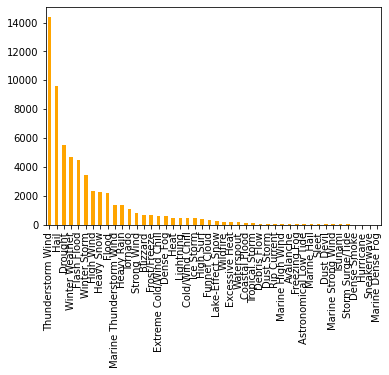

In [ ]:
eventscounts.plot.bar(color="orange")

In [ ]:
eventcounts

,Tipo de Evento,Cuenta
0,Thunderstorm Wind,14355
1,Hail,9625
2,Drought,5539
3,Winter Weather,4669
4,Flash Flood,4484
5,Winter Storm,3446
6,High Wind,2307
7,Heavy Snow,2225
8,Flood,2176
9,Marine Thunderstorm Wind,1388


In [ ]:

eventscounts_descending=eventscounts.sort_values(ascending=True, kind='quicksort')
eventscounts_descending=eventscounts_descending.to_frame()
eventscounts_descending=eventscounts_descending.reset_index()
eventscounts_descending=eventscounts_descending.rename(columns={"index":"Tipo de Evento","Event_Type":"Cuenta"})
eventscounts_descending

,Tipo de Evento,Cuenta
0,Marine Dense Fog,1
1,Sneakerwave,2
2,Hurricane,2
3,Dense Smoke,3
4,Storm Surge/Tide,4
5,Tsunami,5
6,Marine Strong Wind,7
7,Dust Devil,12
8,Sleet,18
9,Marine Hail,22


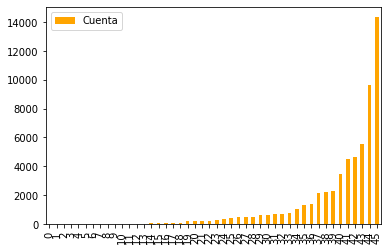

In [ ]:
eventscounts_descending.plot.bar(color="orange")

Otra posible visualización, que es útil

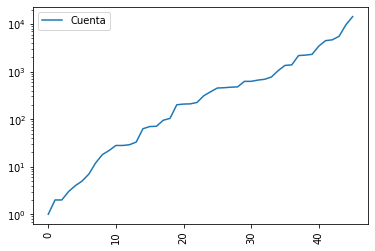

In [ ]:
eventscounts_descending.plot(rot="90",logy=True)

# ListPlot similar al de Wolfram

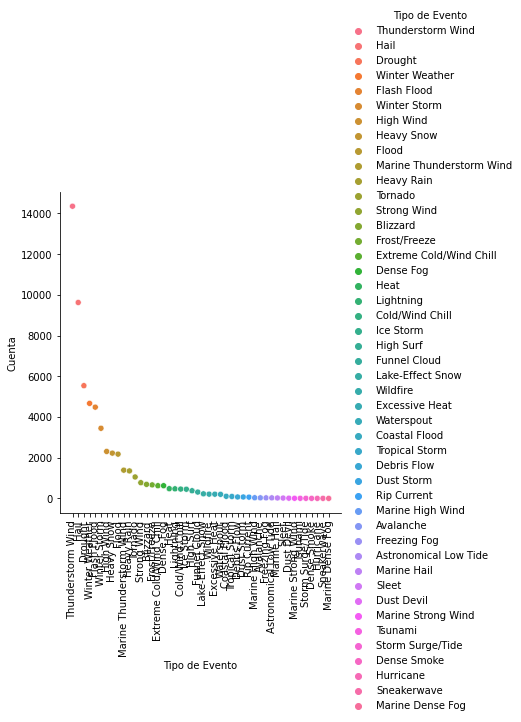

In [ ]:
g=sns.relplot(data=eventcounts, x="Tipo de Evento", y="Cuenta", hue="Tipo de Evento")
g.set_xticklabels(rotation=90)


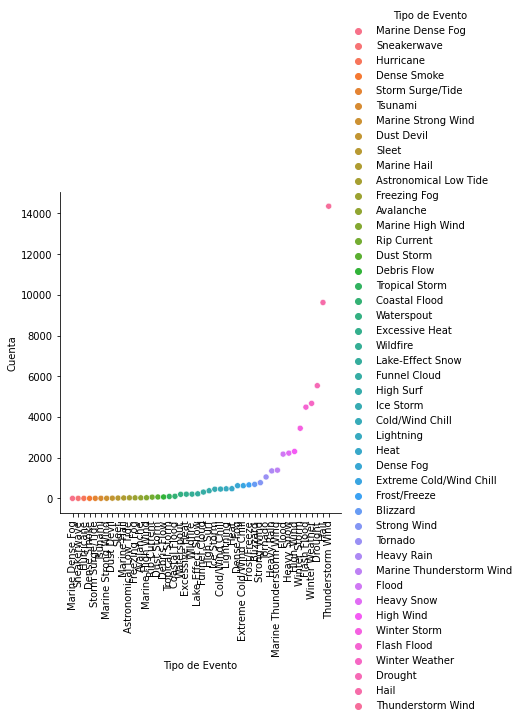

In [ ]:
l=sns.relplot(data=eventscounts_descending, x="Tipo de Evento", y="Cuenta", hue="Tipo de Evento")
l.set_xticklabels(rotation=90)


In [ ]:
events2013.values

array(['Winter Weather', 'Heavy Snow', 'Heavy Snow', ...,
       'Lake-Effect Snow', 'Winter Weather', 'Lake-Effect Snow'],
      dtype=object)

In [ ]:
df;

In [ ]:
#df["Damage_Property"]=df["Damage_Property"]%.str.split(pat="K")

# Corrección de valores para K, M, B

In [ ]:
#Para crear un sistema que remplace las abreviaciones podemos establecer un diccionario
dct = {'K': '000', 'M': '000000', 'B':'000000000'}
df["Damage_Property"]=(pd.to_numeric(df.Damage_Property.str.replace(r'|'.join(dct.keys()),
    lambda x: dct[x.group()]), errors='coerce'))
df[["Damage_Property"]]

,Damage_Property
0,0.0
1,0.0
2,0.0
3,3.0
4,0.0
...,...
59980,0.0
59981,0.0
59982,0.0
59983,0.0


In [ ]:
#df["Damage_Crops"].max()

In [ ]:
#df["Property_Cost"]=(pd.to_numeric(df.Property_Cost.str.replace(r'|'.join(dct.keys()),
 #   lambda y: dct[y.group()]), errors='coerce'))
df["Damage_Crops"]=(pd.to_numeric(df.Damage_Crops.str.replace(r'|'.join(dct.keys()),lambda x: dct[x.group()]), errors='coerce'))
#df["Crop_Cost"]=(pd.to_numeric(df.Crop_Cost.str.replace(r'|'.join(dct.keys()),
  #  lambda t: dct[t.group()]), errors='coerce'))
df[["Damage_Crops"]]

,Damage_Crops
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
59980,0.0
59981,0.0
59982,0.0
59983,0.0


In [ ]:
df["Damage_Crops"].max()
df;

In [ ]:
eventsDP=df[["Damage_Property"]]

In [ ]:
eventscountsDP=eventsDP.value_counts()
eventcountsDP=eventscountsDP.to_frame()
eventcountsDP=eventcountsDP.reset_index()
eventcountsDP.columns
eventcountsDP=eventcountsDP.rename(columns={"index":"Valor","Event_Type":"Cuenta"})
eventscountsDP.to_frame()
eventscountsDP

Damage_Property
0.0                37277
5.0                 1980
1.0                 1788
10.0                1594
2.0                 1336
                   ...  
297.0                  1
21.7                   1
325.0                  1
19.0                   1
8000.0                 1
Length: 263, dtype: int64

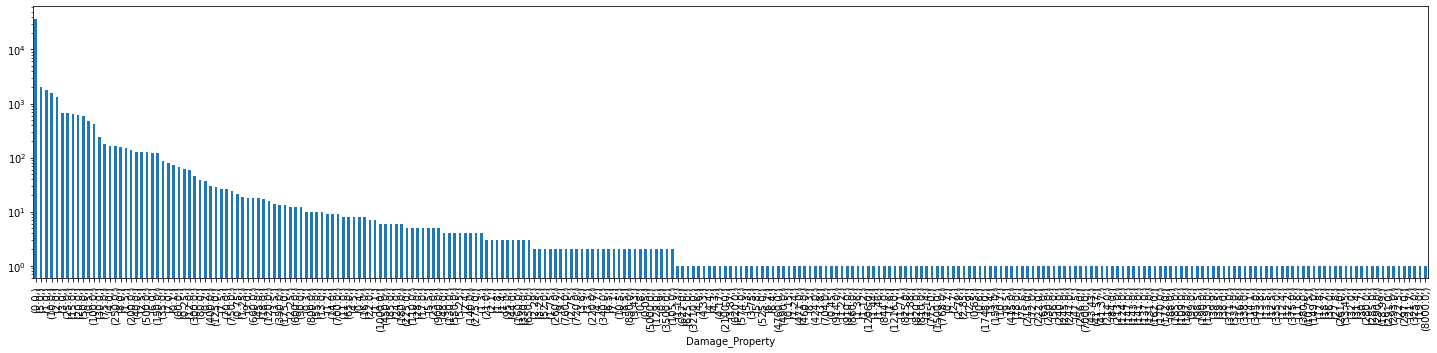

In [ ]:
plt.figure(figsize=(25,5))
eventscountsDP.plot.bar(logy=True)
plt.show()

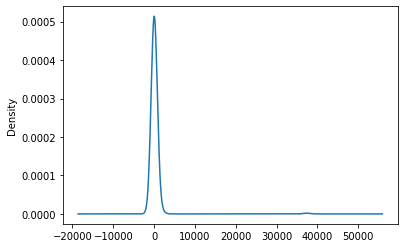

In [ ]:
eventscountsDP.plot.kde() 
#Quizá es más conveniente visualizar a través de la probabilidad que valor tendrá mayor probabilidad de ser encontrado